Workout Visualization

In [36]:
#import packages
import datetime as dt
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                     # visualization
from matplotlib.ticker import FuncFormatter

In [2]:

all_dates = pd.DataFrame(pd.date_range('2022-06-01','2031-01-01'), columns = ['dates'])
all_dates['first_day_key'] = [x.replace(day=1) for x in all_dates['dates']]
all_dates['day_num'] = all_dates['dates'].dt.day_name()

all_dates

,dates,first_day_key,day_num
0,2022-06-01,2022-06-01,Wednesday
1,2022-06-02,2022-06-01,Thursday
2,2022-06-03,2022-06-01,Friday
3,2022-06-04,2022-06-01,Saturday
4,2022-06-05,2022-06-01,Sunday
...,...,...,...
3132,2030-12-28,2030-12-01,Saturday
3133,2030-12-29,2030-12-01,Sunday
3134,2030-12-30,2030-12-01,Monday
3135,2030-12-31,2030-12-01,Tuesday


In [3]:
all_dates_pivot = pd.pivot_table(all_dates,index='first_day_key',values='dates', columns='day_num',aggfunc='count')
all_dates_pivot = all_dates_pivot.iloc[:-1 , :]

all_dates_pivot

day_num,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
first_day_key,,,,,,,
2022-06-01,4.0,4.0,4.0,4.0,5.0,4.0,5.0
2022-07-01,5.0,4.0,5.0,5.0,4.0,4.0,4.0
2022-08-01,4.0,5.0,4.0,4.0,4.0,5.0,5.0
2022-09-01,5.0,4.0,4.0,4.0,5.0,4.0,4.0
2022-10-01,4.0,5.0,5.0,5.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...
2030-08-01,5.0,4.0,5.0,4.0,5.0,4.0,4.0
2030-09-01,4.0,5.0,4.0,5.0,4.0,4.0,4.0
2030-10-01,4.0,4.0,4.0,4.0,5.0,5.0,5.0


In [4]:
all_dates_unpivot = all_dates_pivot.reset_index()
all_dates_unpivot

day_num,first_day_key,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2022-06-01,4.0,4.0,4.0,4.0,5.0,4.0,5.0
1,2022-07-01,5.0,4.0,5.0,5.0,4.0,4.0,4.0
2,2022-08-01,4.0,5.0,4.0,4.0,4.0,5.0,5.0
3,2022-09-01,5.0,4.0,4.0,4.0,5.0,4.0,4.0
4,2022-10-01,4.0,5.0,5.0,5.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
98,2030-08-01,5.0,4.0,5.0,4.0,5.0,4.0,4.0
99,2030-09-01,4.0,5.0,4.0,5.0,4.0,4.0,4.0
100,2030-10-01,4.0,4.0,4.0,4.0,5.0,5.0,5.0
101,2030-11-01,5.0,4.0,5.0,4.0,4.0,4.0,4.0


In [5]:
#import log file
workout_log = pd.read_csv(r'C:\Users\quinn\OneDrive\Documents\Quinn Python Scripts\upload to python\Workout - Log.csv')

#Case When Then equivalent https://www.statology.org/case-statement-pandas/
workout_log['Workout Day'] = np.where(workout_log['Workout']==1, 'Monday',
                   np.where(workout_log['Workout']==2, 'Wednesday',
                   np.where(workout_log['Workout']==3, 'Friday', 'Other')))

workout_log['Date'] = pd.to_datetime(workout_log['Date'])
workout_log['Date'] = workout_log['Date'].dt.floor('d')

workout_log['first_day_key'] = [x.replace(day=1) for x in workout_log['Date']]

workout_log

,Date,Lift,Quinn Sets,Quinn Reps,Quinn Weight,Quinn Total Reps,Nicole Sets,Nicole Reps,Nicole Weight,Nicole Total Reps,Workout,Workout Day,first_day_key
0,2022-06-02,Bench (Smith Neutral),3.0,5.0,197.0,15.0,NaN,NaN,NaN,0.0,1.0,Monday,2022-06-01
1,2022-06-02,Curl (Preacher),3.0,10.0,90.0,30.0,NaN,NaN,NaN,0.0,3.0,Friday,2022-06-01
2,2022-06-02,Tricep (Dumbell),3.0,15.0,35.0,45.0,NaN,NaN,NaN,0.0,1.0,Monday,2022-06-01
3,2022-06-02,Pull Down,3.0,10.0,70.0,30.0,NaN,NaN,NaN,0.0,1.0,Monday,2022-06-01
4,2022-06-03,Bench (Smith Neutral),2.0,15.0,107.0,30.0,NaN,NaN,NaN,0.0,1.0,Monday,2022-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaT
1250,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaT
1251,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaT
1252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaT


In [6]:
quinn_log = workout_log[['Date','Lift', 'Quinn Sets', 'Quinn Reps', 'Quinn Weight', 'Quinn Total Reps','Workout Day','first_day_key']]
quinn_log = quinn_log.loc[quinn_log['Date'].notnull(),['Date','Lift', 'Quinn Sets', 'Quinn Reps', 'Quinn Weight', 'Quinn Total Reps','Workout Day','first_day_key']]
# #df.loc[df['Survive'].notnull(), ['Age','Fare', 'Group_Size','deck', 'Pclass', 'Title' ]]
quinn_log = quinn_log.fillna(0)
#quinn_log
quinn_log_pivot = pd.pivot_table(quinn_log,index=['Date','first_day_key','Workout Day'],values='Quinn Total Reps',aggfunc='sum')
#quinn_log_pivot
quinn_log_unpivot = quinn_log_pivot.reset_index()
quinn_log_unpivot = quinn_log_unpivot[(quinn_log_unpivot['Quinn Total Reps']!= 0) & (quinn_log_unpivot['Quinn Total Reps'].notnull())]
quinn_log_unpivot = pd.pivot_table(quinn_log_unpivot,index='first_day_key',values='Date', columns='Workout Day',aggfunc=lambda x: len(x.unique()))
quinn_log_unpivot = quinn_log_unpivot.fillna(0)
quinn_log_unpivot = quinn_log_unpivot.reset_index()
quinn_log_unpivot


Workout Day,first_day_key,Friday,Monday,Other,Wednesday
0,2022-06-01,6.0,9.0,5.0,4.0
1,2022-07-01,6.0,5.0,1.0,4.0
2,2022-08-01,3.0,6.0,1.0,5.0
3,2022-09-01,3.0,4.0,0.0,4.0
4,2022-10-01,2.0,4.0,0.0,2.0
5,2022-11-01,2.0,3.0,0.0,3.0
6,2022-12-01,5.0,5.0,0.0,5.0
7,2023-01-01,2.0,4.0,0.0,3.0
8,2023-02-01,3.0,4.0,0.0,4.0
9,2023-03-01,4.0,4.0,0.0,4.0


In [7]:
quinn_log_total = quinn_log_unpivot.merge(all_dates_unpivot, on='first_day_key')
quinn_log_total

,first_day_key,Friday_x,Monday_x,Other,Wednesday_x,Friday_y,Monday_y,Saturday,Sunday,Thursday,Tuesday,Wednesday_y
0,2022-06-01,6.0,9.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0
1,2022-07-01,6.0,5.0,1.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0
2,2022-08-01,3.0,6.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0
3,2022-09-01,3.0,4.0,0.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0
4,2022-10-01,2.0,4.0,0.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0
5,2022-11-01,2.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
6,2022-12-01,5.0,5.0,0.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0
7,2023-01-01,2.0,4.0,0.0,3.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0
8,2023-02-01,3.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
9,2023-03-01,4.0,4.0,0.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0


In [38]:
quinn_log_total['Monday Workouts'] = (quinn_log_total['Monday_x'] / quinn_log_total['Monday_y'])*100
quinn_log_total['Wednesday Workouts'] = (quinn_log_total['Wednesday_x'] / quinn_log_total['Wednesday_y'])*100
quinn_log_total['Friday Workouts'] = (quinn_log_total['Friday_x'] / quinn_log_total['Friday_y'])*100
quinn_log_total["Month"] = quinn_log_total["first_day_key"].dt.strftime('%b %Y')
quinn_log_total

,first_day_key,Friday_x,Monday_x,Other,Wednesday_x,Friday_y,Monday_y,Saturday,Sunday,Thursday,...,Monday_Percent,Wednesday_Percent,Friday_Percent,Month,Monday Percent,Wednesday Percent,Friday Percent,Monday Workouts,Wednesday Workouts,Friday Workouts
0,2022-06-01,6.0,9.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,...,225.0,80.0,150.0,Jun 2022,225.0,80.0,150.0,225.0,80.0,150.0
1,2022-07-01,6.0,5.0,1.0,4.0,5.0,4.0,5.0,5.0,4.0,...,125.0,100.0,120.0,Jul 2022,125.0,100.0,120.0,125.0,100.0,120.0
2,2022-08-01,3.0,6.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,...,120.0,100.0,75.0,Aug 2022,120.0,100.0,75.0,120.0,100.0,75.0
3,2022-09-01,3.0,4.0,0.0,4.0,5.0,4.0,4.0,4.0,5.0,...,100.0,100.0,60.0,Sep 2022,100.0,100.0,60.0,100.0,100.0,60.0
4,2022-10-01,2.0,4.0,0.0,2.0,4.0,5.0,5.0,5.0,4.0,...,80.0,50.0,50.0,Oct 2022,80.0,50.0,50.0,80.0,50.0,50.0
5,2022-11-01,2.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,75.0,60.0,50.0,Nov 2022,75.0,60.0,50.0,75.0,60.0,50.0
6,2022-12-01,5.0,5.0,0.0,5.0,5.0,4.0,5.0,4.0,5.0,...,125.0,125.0,100.0,Dec 2022,125.0,125.0,100.0,125.0,125.0,100.0
7,2023-01-01,2.0,4.0,0.0,3.0,4.0,5.0,4.0,5.0,4.0,...,80.0,75.0,50.0,Jan 2023,80.0,75.0,50.0,80.0,75.0,50.0
8,2023-02-01,3.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,...,100.0,100.0,75.0,Feb 2023,100.0,100.0,75.0,100.0,100.0,75.0
9,2023-03-01,4.0,4.0,0.0,4.0,5.0,4.0,4.0,4.0,5.0,...,100.0,80.0,80.0,Mar 2023,100.0,80.0,80.0,100.0,80.0,80.0


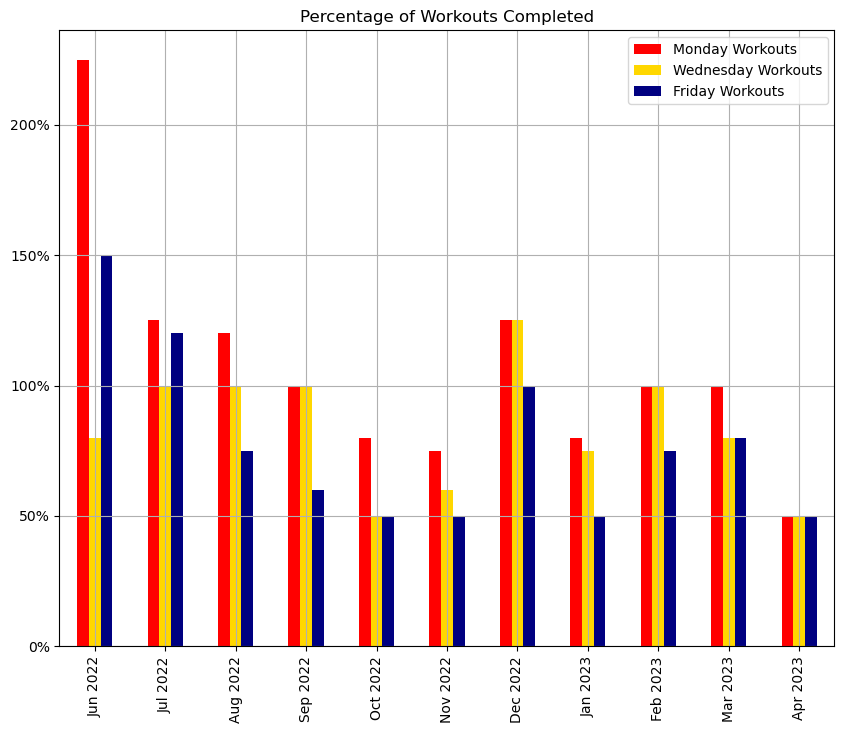

In [45]:
plot = quinn_log_total.plot(x='Month', y=["Monday Workouts", "Wednesday Workouts","Friday Workouts"], kind="bar", grid=True, color=['red', 'gold', 'navy'])
plt.xticks(rotation = 90)
plt.title("Percentage of Workouts Completed")
plot.set_xlabel("")

def percent_formatter(x, pos):
    return f"{x:.0f}%"

formatter = FuncFormatter(percent_formatter)
plot.yaxis.set_major_formatter(formatter)
#plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.gcf().set_size_inches(10, 8)

plt.savefig('Workouts.jpg', dpi=300)
plt.show()